In [0]:
# Download the dataset here: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
#from google.colab import files

#upload = files.upload()

#Data Exploration

In [0]:
# Read the data into the notebook
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv', index_col='Id')

In [3]:
# Print length of dataset and number of columns
train.shape

(1460, 80)

In [4]:
# Look through the features
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [5]:
# Sample data 
train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


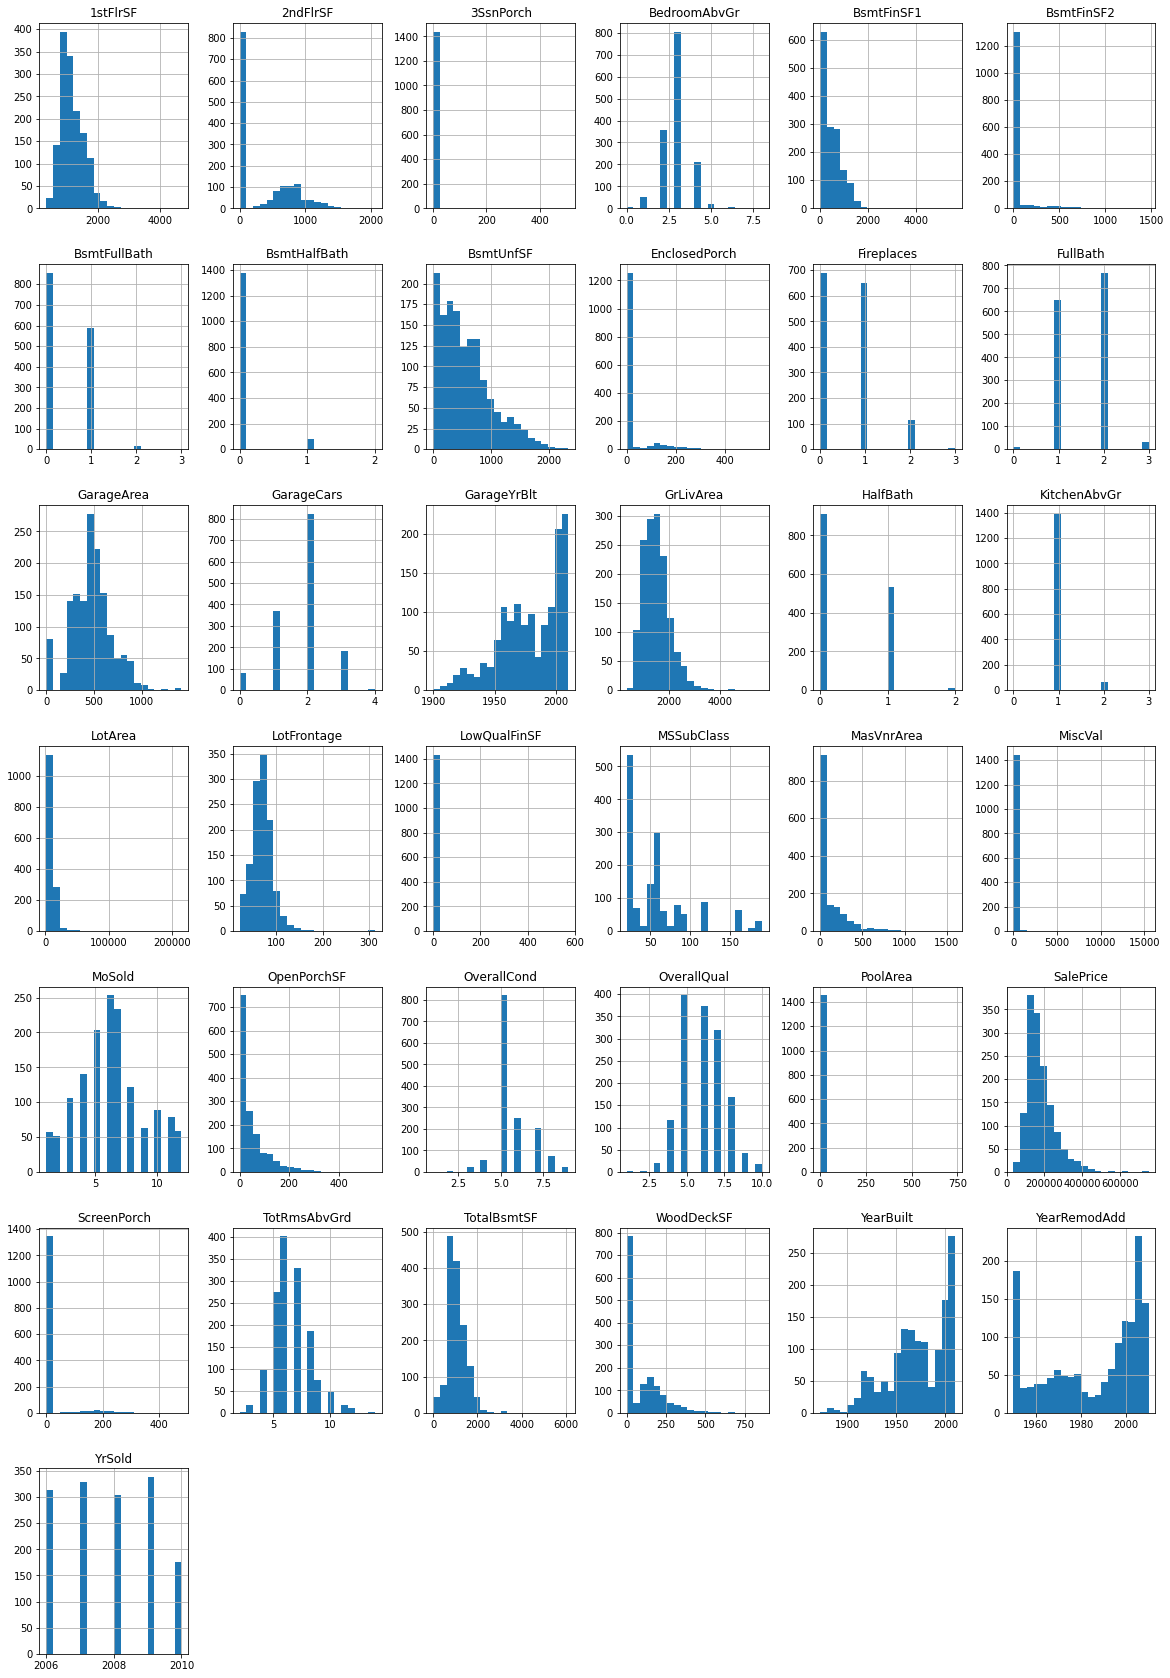

In [6]:
# Display histograms of all the different features
plots = train.hist(bins=20,figsize = (20,30))

In [7]:
# Describe the dataframe (Min, max, mean, null, etc)
desc = train.describe(include = 'all')

desc.loc['dtype'] = train.dtypes
desc.loc['size'] = len(train)
desc.loc['% null'] = train.isnull().mean() * 100

desc

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460,1460,1201,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1452,1460,1460,1460,1423,1423,1422,1423,1460,1422,1460,1460,1460,1460,1460,1460,1459,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,770,1379,1379,1379,1460,1460,1379,1379,1460,1460,1460,1460,1460,1460,1460,7,281,54,1460,1460,1460,1460,1460,1460
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.8973,NaN,70.05,10516.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.09932,5.57534,1971.27,1984.87,NaN,NaN,NaN,NaN,NaN,103.685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.64,NaN,46.5493,567.24,1057.43,NaN,NaN,NaN,NaN,1162.63,346.992,5.84452,1515.46,0.425342,0.0575342,1.56507,0.382877,2.86644,1.04658,NaN,6.51781,NaN,0.613014,NaN,NaN,1978.51,NaN,1.76712,472.98,NaN,NaN,NaN,94.2445,46.6603,21.9541,3.40959,15.061,2.7589,NaN,NaN,NaN,43.489,6.32192,2007.82,NaN,NaN,180921
std,42.3006,NaN,24.2848,9981.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.383,1.1128,30.2029,20.6454,NaN,NaN,NaN,NaN,NaN,181.066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098,NaN,161.319,441.867,438.705,NaN,NaN,NaN,NaN,386.588,436.528,48.6231,525.48,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.62539,NaN,0.644666,NaN,NaN,24.6897,NaN,0.747315,213.805,NaN,NaN,NaN,125.339,66.256,61.1191,29.3173,55.7574,40.1773,NaN,NaN,NaN,496.123,2.70363,1.3281,NaN,NaN,79442.5
min,20,NaN,21,1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1872,1950,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,0,NaN,NaN,NaN,NaN,334,0,0,334,0,0,0,0,0,0,NaN,2,NaN,0,NaN,NaN,1900,NaN,0,0,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2006,NaN,NaN,34900
25%,20,NaN,59,7553.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1954,1967,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,223,795.75,NaN,NaN,NaN,NaN,882,0,0,1129.5,0,0,1,0,2,1,NaN,5,NaN,0,NaN,NaN,1961,NaN,1,334.5,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,NaN,NaN,129975
50%,50,NaN,69,9478.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,5,1973,1994,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,383.5,NaN,0,477.5,991.5,NaN,NaN,NaN,NaN,1087,0,0,1464,0,0,2,0,3,1,NaN,6,NaN,1,NaN,NaN,1980,NaN,2,480,NaN,NaN,NaN,0,25,0,0,0,0,NaN,NaN,NaN,0,6,2008,NaN,NaN,163000
75%,7

In [0]:
# Too hard to read but worth a look - scatter matrix for all features
#plots = pd.plotting.scatter_matrix(train, figsize=(30,50))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


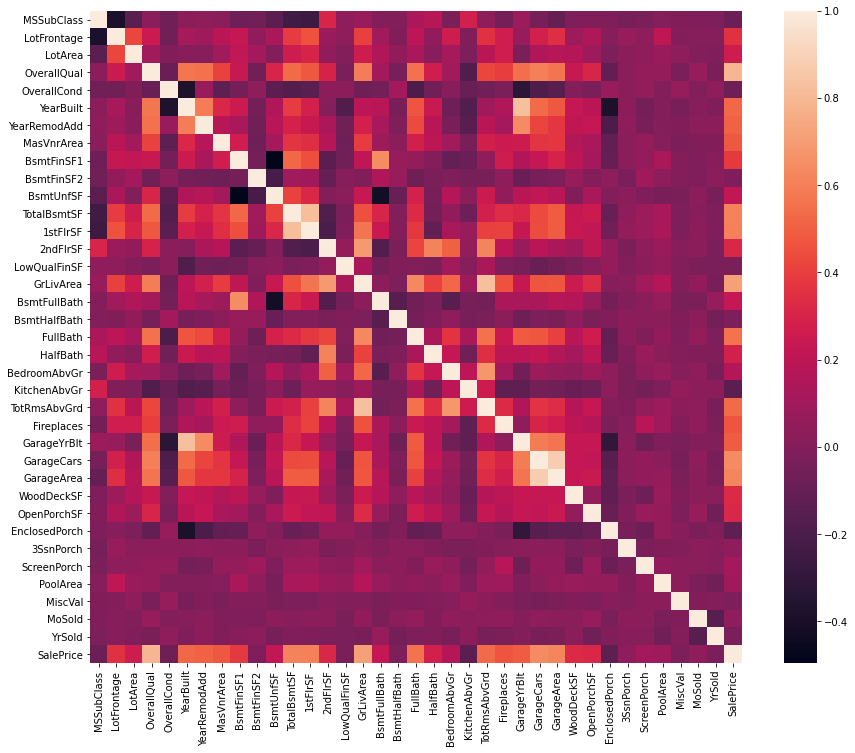

In [9]:
# View a heat map of the correlation between features
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(train.corr(), square=True);

In [10]:
# Display the features with the highest correlation to sale price
train.corr().nlargest(15, 'SalePrice')['SalePrice'].index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')

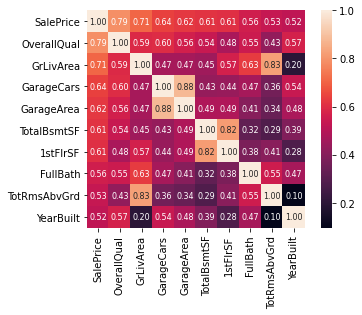

In [11]:
# Print a heatmap of the 10 most correlated (to sale price) variables
n = 10
cols = train.corr().nlargest(n, 'SalePrice')['SalePrice'].index
hm = sns.heatmap(
    data=np.corrcoef(train[cols].values.T),
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 8},
    yticklabels=cols.values,
    xticklabels=cols.values
)
plt.show()

#Variable Cleaning

Let's clean up data to reduce the number of variables and guess missing values.

In [12]:
#check data information
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [13]:
#check missing vlaues
train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [14]:
#categorical variables
cat_var=['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']
len(cat_var)

46

In [15]:
#date (year) variables
dat_var=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
len(dat_var)

4

In [16]:
#numerical variables
num_var=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold']
len(num_var)

29

In [17]:
#define data type of categorical variables
for i in cat_var:
  train[i]=train[i].astype('category') 
 
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1201 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   Alley          91 non-null     category
 6   LotShape       1460 non-null   category
 7   LandContour    1460 non-null   category
 8   Utilities      1460 non-null   category
 9   LotConfig      1460 non-null   category
 10  LandSlope      1460 non-null   category
 11  Neighborhood   1460 non-null   category
 12  Condition1     1460 non-null   category
 13  Condition2     1460 non-null   category
 14  BldgType       1460 non-null   category
 15  HouseStyle     1460 non-null   category
 16  OverallQual    1460 non-null   category
 17  OverallCond    1460 non-null   ca

*  Create calculated metrics to see if the calculated values will give better correlation. 



In [18]:
#calculate the number of years after built/remodeled/garage built  == new numerical variables

train['YrAfterBuilt']=train['YrSold']-train['YearBuilt']
train['YrAfterRemodeled']=train['YrSold']-train['YearRemodAdd']
train['YrAfterGarageBuilt']=train['YrSold']-train['GarageYrBlt']
train[['YrAfterBuilt','YrAfterRemodeled','YrAfterGarageBuilt']].head()

,YrAfterBuilt,YrAfterRemodeled,YrAfterGarageBuilt
Id,,,
1,5,5,5.0
2,31,31,31.0
3,7,6,7.0
4,91,36,8.0
5,8,8,8.0


*   We grouped the variables by features, to make it easy to understand the variables. 


In [0]:
#sort variables by features
var_housetype = ['MSSubClass','LandContour','LotShape','LotConfig','LandSlope','BldgType','HouseStyle']
var_zone=['MSZoning','Neighborhood']
var_access=['Street','Alley','Condition1','Condition2']
var_size=['LotFrontage','LotArea',]
var_util=['Utilities']
var_housecond=['OverallQual','OverallCond','YearBuilt','YearRemodAdd','Foundation','Electrical','Functional','MiscVal','MiscFeature','YrAfterBuilt','YrAfterRemodeled']
var_ext=['RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond']
var_base=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','TotalBsmtSF']
var_heat=['Heating','HeatingQC','CentralAir','Fireplaces','FireplaceQu']
var_int=['1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd']
var_garage=['YrAfterGarageBuilt','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence']
var_sales=['MoSold','YrSold','SaleType','SaleCondition']

*   And then, calculated the correlation between variables in the same group. We cannot calculate the correlation of the groups with one or zero numerical varibales.


In [20]:
#calculate correlation between variables in the same group
#there is no numerical variable in the group
train[var_housetype].corr()

""


In [21]:
#calculate correlation between variables in the same group
#there is no numerical variable 
train[var_zone].corr()

""


In [22]:
#calculate correlation between variables in the same group
#there is no numerical variable in the group
train[var_access].corr()

""


In [23]:
#calculate correlation between variables in the same group
train[var_size].corr()

,LotFrontage,LotArea
LotFrontage,1.000000,0.426095
LotArea,0.426095,1.000000


In [24]:
#calculate correlation between variables in the same group
#there is no numerical variable in the group
train[var_util].corr()

""


In [25]:
#calculate correlation between variables in the same group
train[var_housecond].corr()

,YearBuilt,YearRemodAdd,MiscVal,YrAfterBuilt,YrAfterRemodeled
YearBuilt,1.000000,0.592855,-0.034383,-0.999036,-0.593868
YearRemodAdd,0.592855,1.000000,-0.010286,-0.590360,-0.997930
MiscVal,-0.034383,-0.010286,1.000000,0.034545,0.010604
YrAfterBuilt,-0.999036,-0.590360,0.034545,1.000000,0.594195
YrAfterRemodeled,-0.593868,-0.997930,0.010604,0.594195,1.000000


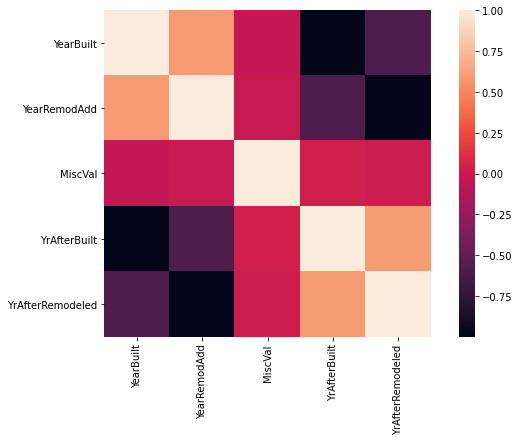

In [26]:
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(train[var_housecond].corr(), square=True);

*   YearBuilt and YearRemodAdd are highly correlated. Others are not.



In [27]:
#calculate correlation between variables in the same group
#there is one numerical varible in the group
train[var_ext].corr()

,MasVnrArea
MasVnrArea,1.0


In [28]:
#calculate correlation between variables in the same group
train[var_base].corr()

,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF
BsmtFinSF1,1.000000,-0.050117,0.522396
BsmtFinSF2,-0.050117,1.000000,0.104810
TotalBsmtSF,0.522396,0.104810,1.000000


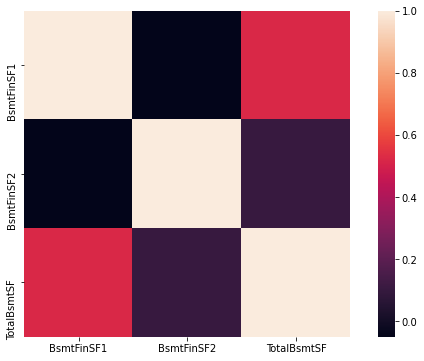

In [29]:
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(train[var_base].corr(), square=True);

*   There is no highly correlated variable in var_base group.

In [30]:
#calculate correlation between variables in the same group
#there is one numerical variable in the group
train[var_heat].corr()

,Fireplaces
Fireplaces,1.0


In [31]:
#calculate correlation between variables in the same group
train[var_int].corr()

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd
1stFlrSF,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516
2ndFlrSF,-0.202646,1.000000,0.063353,0.687501,-0.169494,-0.023855,0.421378,0.609707,0.502901,0.059306,0.616423
LowQualFinSF,-0.014241,0.063353,1.000000,0.134683,-0.047143,-0.005842,-0.000710,-0.027080,0.105607,0.007522,0.131185
GrLivArea,0.566024,0.687501,0.134683,1.000000,0.034836,-0.018918,0.630012,0.415772,0.521270,0.100063,0.825489
BsmtFullBath,0.244671,-0.169494,-0.047143,0.034836,1.000000,-0.147871,-0.064512,-0.030905,-0.150673,-0.041503,-0.053275
BsmtHalfBath,0.001956,-0.023855,-0.005842,-0.018918,-0.147871,1.000000,-0.054536,-0.012340,0.046519,-0.037944,-0.023836
FullBath,0.380637,0.421378,-0.000710,0.630012,-0.064512,-0.054536,1.000000,0.136381,0.363252,0.133115,0.554784
HalfBath,-0.119916,0.609707,-0.027080,0.415772,-0.030905,-0.012340,0.136381,1.000000,0.226651,-0.068263,0.343415
BedroomAbvGr,0.127401,0.502901,0.105607,0.521270,-0.150673,0.046519,0.363252,0.226651,1.000000,0.198597,0.676620
KitchenAbvGr,0.068101,0.059306,0.007522,0.100063,-0.041503,-0.037944,0.133115,-0.068263,0.198597,1.000000,0.256045


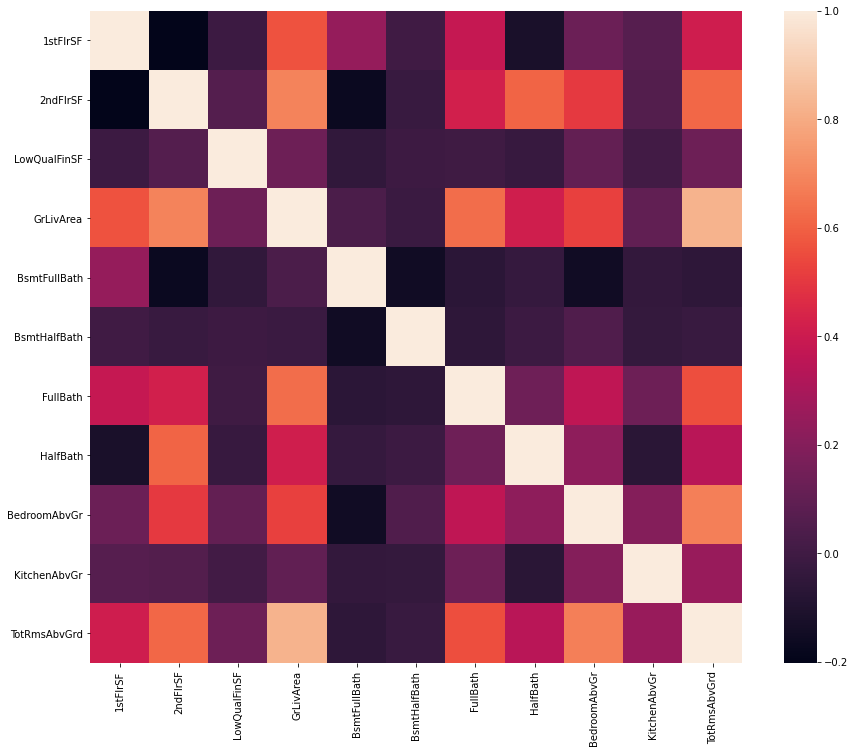

In [32]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(train[var_int].corr(), square=True);

*   GrLivArea is highly correlated with 2ndFlrSF and TotRmsAbvGrd, which makes sense, as they are measuring the size of the property.

In [33]:
#calculate correlation between variables in the same group
train[var_garage].corr()

,YrAfterGarageBuilt,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
YrAfterGarageBuilt,1.000000,-0.998552,-0.590244,-0.565122,-0.223246,-0.231847,0.296273,-0.022460,0.075937,0.011190
GarageYrBlt,-0.998552,1.000000,0.588920,0.564567,0.224577,0.228425,-0.297003,0.023544,-0.075418,-0.014501
GarageCars,-0.590244,0.588920,1.000000,0.882475,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934
GarageArea,-0.565122,0.564567,0.882475,1.000000,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047
WoodDeckSF,-0.223246,0.224577,0.226342,0.224666,1.000000,0.058661,-0.125989,-0.032771,-0.074181,0.073378
OpenPorchSF,-0.231847,0.228425,0.213569,0.241435,0.058661,1.000000,-0.093079,-0.005842,0.074304,0.060762
EnclosedPorch,0.296273,-0.297003,-0.151434,-0.121777,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.054203
3SsnPorch,-0.022460,0.023544,0.035765,0.035087,-0.032771,-0.005842,-0.037305,1.000000,-0.031436,-0.007992
ScreenPorch,0.075937,-0.075418,0.050494,0.051412,-0.074181,0.074304,-0.082864,-0.031436,1.000000,0.051307
PoolArea,0.011190,-0.014501,0.020934,0.061047,0.073378,0.060762,0.054203,-0.007992,0.051307,1.000000


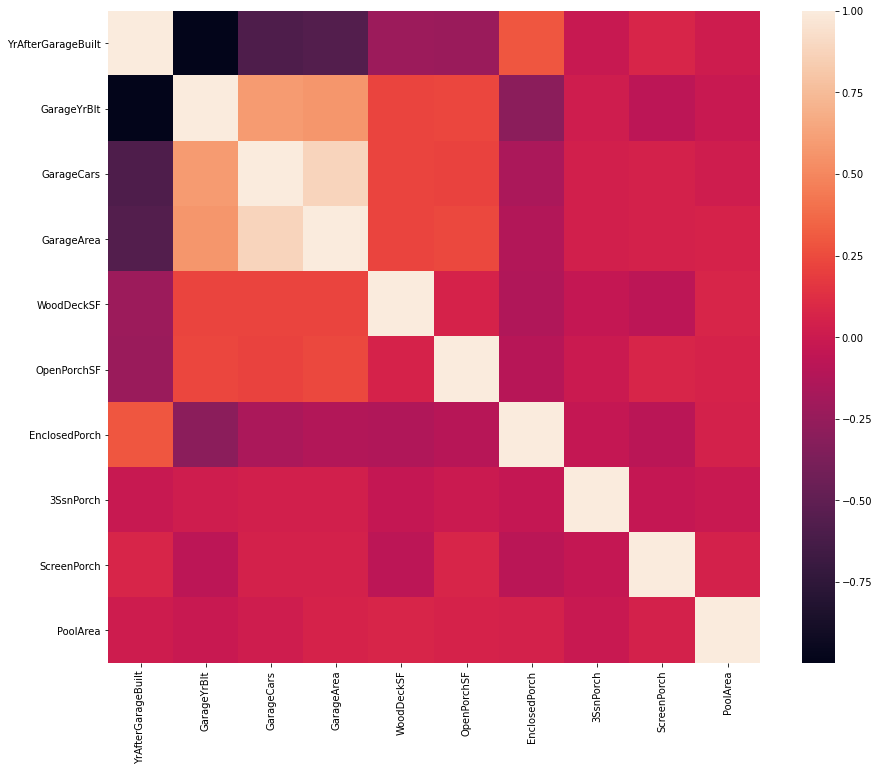

In [34]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(train[var_garage].corr(), square=True);



*   GarageCars is highly correlated with GarageArea.



In [35]:
#calculate correlation between variables in the same group
train[var_sales].corr()

,MoSold,YrSold
MoSold,1.000000,-0.145721
YrSold,-0.145721,1.000000


And then, we checked the top 20 variables with the highest correlation to sales price. 

In [0]:
# Among top 20 variables with the highest correlation to sale price.

var_top20=train.corr().nlargest(20, 'SalePrice')['SalePrice'].index

In [37]:
train[var_top20].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   int64  
 1   GrLivArea     1460 non-null   int64  
 2   GarageCars    1460 non-null   int64  
 3   GarageArea    1460 non-null   int64  
 4   TotalBsmtSF   1460 non-null   int64  
 5   1stFlrSF      1460 non-null   int64  
 6   FullBath      1460 non-null   int64  
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   YearBuilt     1460 non-null   int64  
 9   YearRemodAdd  1460 non-null   int64  
 10  GarageYrBlt   1379 non-null   float64
 11  MasVnrArea    1452 non-null   float64
 12  Fireplaces    1460 non-null   int64  
 13  BsmtFinSF1    1460 non-null   int64  
 14  LotFrontage   1201 non-null   float64
 15  WoodDeckSF    1460 non-null   int64  
 16  2ndFlrSF      1460 non-null   int64  
 17  OpenPorchSF   1460 non-null   int64  
 18  HalfBath      1460 non-null 



*   And visualize the correlation between those selected variables including sales price. 
*   Please note that several rows and columns are blank. Thoes variables have null, which results no correlation calculated due to null values. 





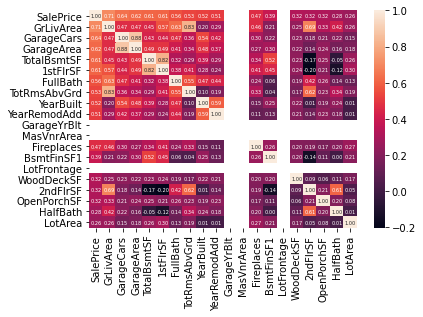

In [38]:
n = 20
cols = train.corr().nlargest(n, 'SalePrice')['SalePrice'].index
hm = sns.heatmap(
    data=np.corrcoef(train[cols].values.T),
    cbar=True,
    annot=True,
    fmt='.2f',
    annot_kws={'size': 5},
    yticklabels=cols.values,
    xticklabels=cols.values
)
plt.show()

Below variables are highly correlated to each other (corr >0.8) and we need to remove one of them to optimize model. 

*   GrLivArea, TotRmsAbvGrd
*   GarageCars, GarageArea
*   TotalBsmtSF, 1stFlrSF








In [39]:
#remove one of two variables highly correlated. 
train_2=train.drop(['GarageArea','TotRmsAbvGrd','1stFlrSF'],axis=1)
train_2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YrAfterBuilt,YrAfterRemodeled,YrAfterGarageBuilt
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NaN,Attchd,2003.0,RFn,2,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5,5,5.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,1976.0,RFn,2,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31,31,31.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,2001.0,RFn,2,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7,6,7.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,1998.0,Unf,3,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91,36,8.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,2000.0,RFn,3,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8,8,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,694,0,1647,0,0,2,1,3,1,TA,Typ,1,TA,Attchd,1999.0,RFn,2,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,8,7,8.0
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,0,0,2073,1,0,2,0,3,1,TA,Min1,2,TA,Attchd,1978.0,Unf,2,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,32,22,32.0
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1152,0,2340,0,0,2,0,4,1,Gd,Typ,2,Gd,Attchd,1941.0,RFn,1,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,69,4,69.0


After removing highly correlated variables, re-calculate the correlation. 

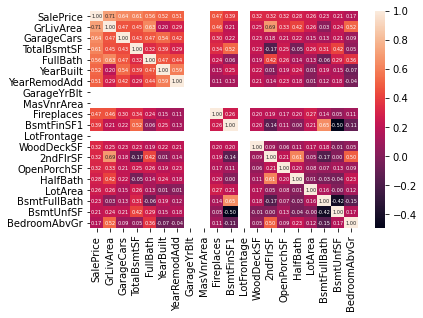

In [40]:
n = 20
cols = train_2.corr().nlargest(n, 'SalePrice')['SalePrice'].index
hm = sns.heatmap(
    data=np.corrcoef(train[cols].values.T),
    cbar=True,
    annot=True,
    fmt='.2f',
    annot_kws={'size': 5},
    yticklabels=cols.values,
    xticklabels=cols.values
)
plt.show()

#Categorical Variables
It is not able to calcualte correlatio of the categorical variabes. But we would like to use some categorical variable for our model.

So, we calculated the average of salesprice in several categories. 

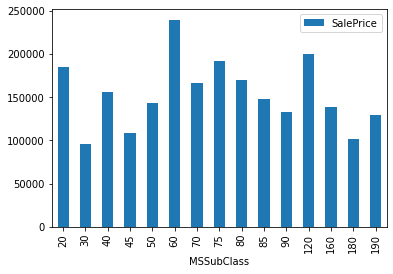

In [41]:
#Examples of categorical Variables : Calculate sales price average by values
train[['MSSubClass','SalePrice']].groupby(['MSSubClass']).mean().plot(kind='bar',color='tab:blue')

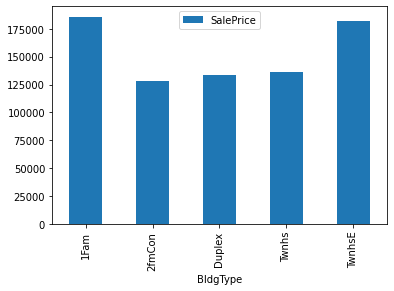

In [42]:
train[['BldgType','SalePrice']].groupby(['BldgType']).mean().plot(kind='bar',color='tab:blue')

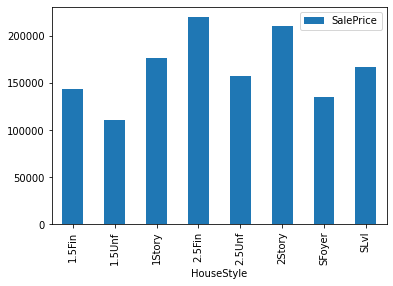

In [43]:
train[['HouseStyle','SalePrice']].groupby(['HouseStyle']).mean().plot(kind='bar',color='tab:blue')

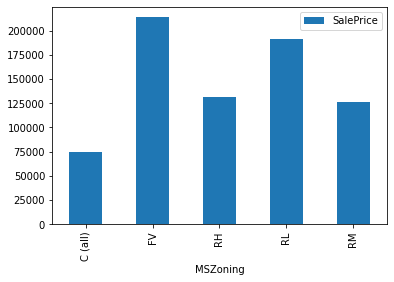

In [44]:
train[['MSZoning','SalePrice']].groupby(['MSZoning']).mean().plot(kind='bar',color='tab:blue')

After calculating the average with several categories, we found 'MSZoning' brings the most significant gaps in sales prices between its values. 
We will revisit categorical variable in the later step. 

# **Data Imputation**

In this section we try to complete the missing values in the columns selected for training. We try to fill in values by median of similar rows.


In [45]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   MSSubClass          1460 non-null   category
 1   MSZoning            1460 non-null   category
 2   LotFrontage         1201 non-null   float64 
 3   LotArea             1460 non-null   int64   
 4   Street              1460 non-null   category
 5   Alley               91 non-null     category
 6   LotShape            1460 non-null   category
 7   LandContour         1460 non-null   category
 8   Utilities           1460 non-null   category
 9   LotConfig           1460 non-null   category
 10  LandSlope           1460 non-null   category
 11  Neighborhood        1460 non-null   category
 12  Condition1          1460 non-null   category
 13  Condition2          1460 non-null   category
 14  BldgType            1460 non-null   category
 15  HouseStyle          1460 non-null   ca

In [46]:
# removing all extra columns, those which are not correlated to sales price strongly
# limit to n= 20
train_3 = train_2[cols];
train_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   int64  
 1   GrLivArea     1460 non-null   int64  
 2   GarageCars    1460 non-null   int64  
 3   TotalBsmtSF   1460 non-null   int64  
 4   FullBath      1460 non-null   int64  
 5   YearBuilt     1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   GarageYrBlt   1379 non-null   float64
 8   MasVnrArea    1452 non-null   float64
 9   Fireplaces    1460 non-null   int64  
 10  BsmtFinSF1    1460 non-null   int64  
 11  LotFrontage   1201 non-null   float64
 12  WoodDeckSF    1460 non-null   int64  
 13  2ndFlrSF      1460 non-null   int64  
 14  OpenPorchSF   1460 non-null   int64  
 15  HalfBath      1460 non-null   int64  
 16  LotArea       1460 non-null   int64  
 17  BsmtFullBath  1460 non-null   int64  
 18  BsmtUnfSF     1460 non-null 

As you can see some values are missing from these 3 columns: GarageYrBlt, MasVnrArea and LotFrontage.
   

Completeing **GarageYrBlt** column:

In [47]:
# function to find the GarageYrBlt by finding the closest group 
# In this function we take the list of rows with similar values as YearBuilt, YearRemodAdd and will consider the mean value of GargeYrBlt of this list
def findGarageYrBlt(yb,yra):
    temp = train[(train['YearBuilt'] == yb) & (train['YearRemodAdd'] == yra)]
    # if list is empty or no value found we reduce conditions to find broader rows
    if (temp.empty)| (temp['GarageYrBlt'].isnull().all()):
       temp = train[(train['YearBuilt'] == yb)]
       # if still no result we reduce conditions again
       if (temp.empty)| (temp['GarageYrBlt'].isnull().all()): 
          temp = train
    temp      
    return round( (temp['GarageYrBlt'].mean(skipna = True)))
      
# test function
findGarageYrBlt(2001,2002)

2001

In [48]:
# create a new column to hold calculated values values
# we don't want to override existing values
train['GarageYr_med'] = np.vectorize(findGarageYrBlt)(train['YearBuilt'], train['YearRemodAdd'])
train['GarageYr_med']


Id
1       2003
2       1976
3       2001
4       1998
5       2000
        ... 
1456    1999
1457    1978
1458    1941
1459    1950
1460    1967
Name: GarageYr_med, Length: 1460, dtype: int64

In [49]:
# make sure each row has some value
train[train['GarageYr_med'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YrAfterBuilt,YrAfterRemodeled,YrAfterGarageBuilt,GarageYr_med
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [50]:
# Now apply to the dataframe
# We just fill the missing values and keep the existing values already there in that column
train['GarageYrBlt'].fillna(train['GarageYr_med'], inplace=True )
train.info()
# check null values if any
train['GarageYrBlt'].isnull()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 84 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   MSSubClass          1460 non-null   category
 1   MSZoning            1460 non-null   category
 2   LotFrontage         1201 non-null   float64 
 3   LotArea             1460 non-null   int64   
 4   Street              1460 non-null   category
 5   Alley               91 non-null     category
 6   LotShape            1460 non-null   category
 7   LandContour         1460 non-null   category
 8   Utilities           1460 non-null   category
 9   LotConfig           1460 non-null   category
 10  LandSlope           1460 non-null   category
 11  Neighborhood        1460 non-null   category
 12  Condition1          1460 non-null   category
 13  Condition2          1460 non-null   category
 14  BldgType            1460 non-null   category
 15  HouseStyle          1460 non-null   ca

Id
1       False
2       False
3       False
4       False
5       False
        ...  
1456    False
1457    False
1458    False
1459    False
1460    False
Name: GarageYrBlt, Length: 1460, dtype: bool

Completing **LotFrontage**:

In [51]:
# For completing lets pick the mean value of records with similar LotArea
# check columns
train[['LotFrontage', 'LotArea']]


,LotFrontage,LotArea
Id,,
1,65.0,8450
2,80.0,9600
3,68.0,11250
4,60.0,9550
5,84.0,14260
...,...,...
1456,62.0,7917
1457,85.0,13175
1458,66.0,9042


In [52]:
# function to find the LotFrontage by finding the closest group 

def findLotFrontage(la):
    # find the records which their LotArea is between 90% to 110% of input value for LotArea
    temp = train[(train['LotArea'] < la *1.10) & (train['LotArea'] > la * 0.9)]
    if (temp.empty)| (temp['LotFrontage'].isnull().all()): 
      temp = train
    # find the mean value of selected rows and round it to 2  
    return round((temp['LotFrontage'].mean(skipna = True)),2) 

# test formula
train[(train['LotArea'] < 9717 *1.10) & (train['LotArea'] > 9717 * 0.9)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YrAfterBuilt,YrAfterRemodeled,YrAfterGarageBuilt,GarageYr_med
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,...,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31,31,31.0,1976
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,...,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91,36,8.0,1998
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,...,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,3,2,3.0,2004
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,...,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,36,36,36.0,1973
14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,Stone,306.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1494,1494,GasA,Ex,...,0,1494,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,3,840,TA,TA,Y,160,33,0,0,0,0,NaN,NaN,NaN,0,8,2007,New,Partial,279500,1,0,1.0,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,2Story,5,5,1974,1974,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,896,896,GasA,TA,...,0,1792,0,0,2,2,4,2,TA,8,Typ,0,NaN,NaN,1974.0,NaN,0,0,NaN,NaN,Y,32,45,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000,35,35,NaN,1974
1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2008,2009,Gable,CompShg,CemntBd,CmentBd,Stone,194.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1573,1573,GasA,Ex,...,0,1578,0,0,2,0,3,1,Ex,7,Typ,1,Gd,Attchd,2008.0,Fin,3,840,TA,TA,Y,0,36,0,0,0,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090,1,0,1.0,2009
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,...,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,69,4,69.0,1941


In [53]:
# test function
findLotFrontage(9720)

73.21

In [54]:
# create a new column for replacement values in order not to override existing values
train['Frontage_med'] = np.vectorize(findLotFrontage)(train['LotArea'] )
train['Frontage_med']


Id
1       67.69
2       73.07
3       79.21
4       72.83
5       87.00
        ...  
1456    65.04
1457    85.65
1458    69.96
1459    73.26
1460    73.25
Name: Frontage_med, Length: 1460, dtype: float64

In [55]:
# make sure each row has some value
train[train['Frontage_med'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YrAfterBuilt,YrAfterRemodeled,YrAfterGarageBuilt,GarageYr_med,Frontage_med
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [56]:
# Now apply to the dataframe
# Filling the missing values only
train['LotFrontage'].fillna(train['Frontage_med'], inplace=True )
train.info()
# check null values if any
train['LotFrontage'].isnull()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 85 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   MSSubClass          1460 non-null   category
 1   MSZoning            1460 non-null   category
 2   LotFrontage         1460 non-null   float64 
 3   LotArea             1460 non-null   int64   
 4   Street              1460 non-null   category
 5   Alley               91 non-null     category
 6   LotShape            1460 non-null   category
 7   LandContour         1460 non-null   category
 8   Utilities           1460 non-null   category
 9   LotConfig           1460 non-null   category
 10  LandSlope           1460 non-null   category
 11  Neighborhood        1460 non-null   category
 12  Condition1          1460 non-null   category
 13  Condition2          1460 non-null   category
 14  BldgType            1460 non-null   category
 15  HouseStyle          1460 non-null   ca

Id
1       False
2       False
3       False
4       False
5       False
        ...  
1456    False
1457    False
1458    False
1459    False
1460    False
Name: LotFrontage, Length: 1460, dtype: bool

Completing **MasVnrArea**:

In [57]:
# For MasVnrArea pick the mean value of records with similar BldgType, MsSubClass and GrLivArea
#Check values
train[['MasVnrArea', 'BldgType', 'MSSubClass', 'GrLivArea']]

,MasVnrArea,BldgType,MSSubClass,GrLivArea
Id,,,,
1,196.0,1Fam,60,1710
2,0.0,1Fam,20,1262
3,162.0,1Fam,60,1786
4,0.0,1Fam,70,1717
5,350.0,1Fam,60,2198
...,...,...,...,...
1456,0.0,1Fam,60,1647
1457,119.0,1Fam,20,2073
1458,0.0,1Fam,70,2340


In [58]:
# function to find the MasVnrArea estimate by finding the closest group 

def findMasVnrArea(bt,msc,gla):
    # find the records which their GrLivArea is between 90% to 110% of input value for GrLivArea and have same BldgType and MSSubClass
    temp = train[(train['BldgType'] == bt) & (train['MSSubClass'] == msc) & (train['GrLivArea'] < gla*1.10 ) & (train['GrLivArea'] > gla*0.9 )]
    # if the list is empty or no value found for MasVnrArea, expand the list with fewer condition
    if (temp.empty)| (temp['MasVnrArea'].isnull().all()):
       temp = train[(train['BldgType'] == bt) & (train['MSSubClass'] == msc)]
       #if no result, reduce conditions again
       if temp.empty | (temp['MasVnrArea'].isnull().all()):
          temp = train[(train['BldgType'] == bt)]        
    return round((temp['MasVnrArea'].mean(skipna = True)),2)
      
# test function
findMasVnrArea('1Fam', 60,  1786)

102.7

In [59]:
#test formula
temp = train[(train['BldgType'] == '1Fam') & (train['MSSubClass'] == 60) & (train['GrLivArea'] < 1786 *1.10 ) & (train['GrLivArea'] > 1786 *0.9 )]
temp

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YrAfterBuilt,YrAfterRemodeled,YrAfterGarageBuilt,GarageYr_med,Frontage_med
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,...,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5,5,5.0,2003,67.69
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,...,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7,6,7.0,2001,79.21
58,60,RL,89.0,11645,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,860,860,GasA,Ex,...,1720,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2004.0,RFn,2,565,TA,TA,Y,0,70,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD,Normal,196500,2,2,2.0,2004,80.36
73,60,RL,74.0,10141,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,40.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,832,832,GasA,Gd,...,1718,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1998.0,Fin,2,427,TA,TA,Y,0,94,0,0,291,0,NaN,NaN,NaN,0,12,2009,WD,Normal,185000,11,11,11.0,1998,74.83
95,60,RL,69.0,9337,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,6,5,1997,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,PConc,Gd,TA,No,GLQ,648,Unf,0,176,824,GasA,Ex,...,1786,1,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,1997.0,RFn,2,684,TA,TA,Y,0,162,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,204750,10,10,10.0,1997,72.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,60,RL,79.0,12420,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,666,Unf,0,278,944,GasA,Ex,...,1840,1,0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,RFn,2,622,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,230000,8,8,8.0,2001,84.43
1431,60,RL,60.0,21930,Pave,NaN,IR3,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,Unf,0,Unf,0,732,732,GasA,Ex,...,1838,0,0,2,1,4,1,TA,7,Typ,1,Gd,BuiltIn,2005.0,Fin,2,372,TA,TA,Y,100,40,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,192140,1,1,1.0,2005,88.64
1434,60,RL,93.0,10261,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,318.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,936,936,GasA,Ex,...,1792,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,2000.0,Fin,2,451,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,186500,8,8,8.0,2000,75.04


In [60]:
# create a new column for replacement values
train['MasVnrArea_med'] = np.vectorize(findMasVnrArea)(train['BldgType'] , train['MSSubClass'] , train['GrLivArea'] )
train['MasVnrArea_med']


Id
1        78.62
2        74.97
3       102.70
4        11.79
5       229.11
         ...  
1456     61.72
1457    232.37
1458      0.00
1459     40.57
1460     74.07
Name: MasVnrArea_med, Length: 1460, dtype: float64

In [61]:
# make sure each row has some value
train[train['MasVnrArea_med'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YrAfterBuilt,YrAfterRemodeled,YrAfterGarageBuilt,GarageYr_med,Frontage_med,MasVnrArea_med
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [62]:
# Now apply to the dataframe
# Replace the missing values (only)
train['MasVnrArea'].fillna(train['MasVnrArea_med'], inplace=True )
train.info()
# check null values if any
train['MasVnrArea'].isnull()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   MSSubClass          1460 non-null   category
 1   MSZoning            1460 non-null   category
 2   LotFrontage         1460 non-null   float64 
 3   LotArea             1460 non-null   int64   
 4   Street              1460 non-null   category
 5   Alley               91 non-null     category
 6   LotShape            1460 non-null   category
 7   LandContour         1460 non-null   category
 8   Utilities           1460 non-null   category
 9   LotConfig           1460 non-null   category
 10  LandSlope           1460 non-null   category
 11  Neighborhood        1460 non-null   category
 12  Condition1          1460 non-null   category
 13  Condition2          1460 non-null   category
 14  BldgType            1460 non-null   category
 15  HouseStyle          1460 non-null   ca

Id
1       False
2       False
3       False
4       False
5       False
        ...  
1456    False
1457    False
1458    False
1459    False
1460    False
Name: MasVnrArea, Length: 1460, dtype: bool

**Now we have clean data:**

In [63]:
# cols contains selected columns that can be updated
train_selected = train[cols];
# train_selected has 20 columns at this point
train_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   int64  
 1   GrLivArea     1460 non-null   int64  
 2   GarageCars    1460 non-null   int64  
 3   TotalBsmtSF   1460 non-null   int64  
 4   FullBath      1460 non-null   int64  
 5   YearBuilt     1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   GarageYrBlt   1460 non-null   float64
 8   MasVnrArea    1460 non-null   float64
 9   Fireplaces    1460 non-null   int64  
 10  BsmtFinSF1    1460 non-null   int64  
 11  LotFrontage   1460 non-null   float64
 12  WoodDeckSF    1460 non-null   int64  
 13  2ndFlrSF      1460 non-null   int64  
 14  OpenPorchSF   1460 non-null   int64  
 15  HalfBath      1460 non-null   int64  
 16  LotArea       1460 non-null   int64  
 17  BsmtFullBath  1460 non-null   int64  
 18  BsmtUnfSF     1460 non-null 

In [64]:
train_selected

,SalePrice,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,BedroomAbvGr
Id,,,,,,,,,,,,,,,,,,,,
1,208500,1710,2,856,2,2003,2003,2003.0,196.0,0,706,65.0,0,854,61,1,8450,1,150,3
2,181500,1262,2,1262,2,1976,1976,1976.0,0.0,1,978,80.0,298,0,0,0,9600,0,284,3
3,223500,1786,2,920,2,2001,2002,2001.0,162.0,1,486,68.0,0,866,42,1,11250,1,434,3
4,140000,1717,3,756,1,1915,1970,1998.0,0.0,1,216,60.0,0,756,35,0,9550,1,540,3
5,250000,2198,3,1145,2,2000,2000,2000.0,350.0,1,655,84.0,192,1053,84,1,14260,1,490,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,175000,1647,2,953,2,1999,2000,1999.0,0.0,1,0,62.0,0,694,40,1,7917,0,953,3
1457,210000,2073,2,1542,2,1978,1988,1978.0,119.0,2,790,85.0,349,0,0,0,13175,1,589,3
1458,266500,2340,1,1152,2,1941,2006,1941.0,0.0,2,275,66.0,0,1152,60,0,9042,0,877,4


# Create Dummy Variable with Categorical Variable

Since the average of sales prices highly differs by the general zoning classification of the sale ('MSZoning'), we would like to include this one in the variable set. 
However, it would be better to add only one categorical variable than use multiple categorical variables. It is because each categorical variable needs to be converted to multiple dummy variables, which inflates the number of input variables and is possible to cause overfitting issue. 


Thus, we will take only one categorical variable with the most significant gaps in sales prices between its values and convert it to a set of dummy variables using one-hot encoding.

MSZoning: Identifies the general zoning classification of the sale.

*   C(all): Commercial
*   FV: Floating Village Residential 
*   RH: Residential High Density
*   RL: Residential Low Density
*   RM: Residential Medium Density


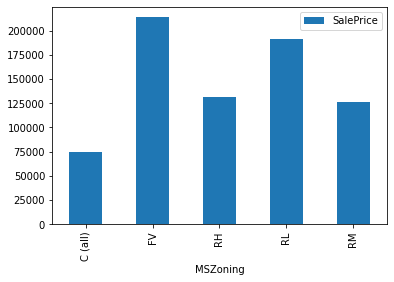

In [65]:
#confirm that salesprices by group of sales zone vary. 
#The Avereage of sales prices is highest in floating village residential area and lowest in commercial area. 
train[['MSZoning','SalePrice']].groupby(['MSZoning']).mean().plot(kind='bar',color='tab:blue')

In [66]:
# Create a set of dummy variables from the categorical variable
pd.get_dummies(train, columns=['MSZoning'])

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,...,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YrAfterBuilt,YrAfterRemodeled,YrAfterGarageBuilt,GarageYr_med,Frontage_med,MasVnrArea_med,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,...,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5,5,5.0,2003,67.69,78.62,0,0,0,1,0
2,20,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,...,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31,31,31.0,1976,73.07,74.97,0,0,0,1,0
3,60,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,...,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7,6,7.0,2001,79.21,102.70,0,0,0,1,0
4,70,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,...,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91,36,8.0,1998,72.83,11.79,0,0,0,1,0
5,60,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,...,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8,8,8.0,2000,87.00,229.11,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,...,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,8,7,8.0,1999,65.04,61.72,0,0,0,1,0
1457,20,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,...,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,32,22,32.0,1978,85.65,232.37,0,0,0,1,0
1458,70,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,...,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,69,4,69.0,1941,69.96,0.00,0,0,0,1,0




*   Add the dummy variable to the dataframe.



In [67]:
#Add 4 dummy variables to the finalized data set. 
#As a result, we can represent 'C (all)' value with [1,0,0,0] and 'RM' value with '[0,0,0,0]'
train_withdummy=train
train_withdummy['MSZoning_C (all)']=pd.get_dummies(train, columns=['MSZoning'])['MSZoning_C (all)']
train_withdummy['MSZoning_FV']=pd.get_dummies(train, columns=['MSZoning'])['MSZoning_FV']
train_withdummy['MSZoning_RH']=pd.get_dummies(train, columns=['MSZoning'])['MSZoning_RH']
train_withdummy['MSZoning_RL']=pd.get_dummies(train, columns=['MSZoning'])['MSZoning_RL']
train_withdummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 90 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   MSSubClass          1460 non-null   category
 1   MSZoning            1460 non-null   category
 2   LotFrontage         1460 non-null   float64 
 3   LotArea             1460 non-null   int64   
 4   Street              1460 non-null   category
 5   Alley               91 non-null     category
 6   LotShape            1460 non-null   category
 7   LandContour         1460 non-null   category
 8   Utilities           1460 non-null   category
 9   LotConfig           1460 non-null   category
 10  LandSlope           1460 non-null   category
 11  Neighborhood        1460 non-null   category
 12  Condition1          1460 non-null   category
 13  Condition2          1460 non-null   category
 14  BldgType            1460 non-null   category
 15  HouseStyle          1460 non-null   ca

#Finalize Data Set
We will select the most highly correlated variables for running model. 

First, let's find the input variables, not including dummy variable 

In [0]:
# Drop highly correlated variables and _med variables
train_clean=train.drop(['GarageArea','TotRmsAbvGrd','1stFlrSF','GarageYr_med','MasVnrArea_med','Frontage_med'],axis=1)

In [85]:
# Display the features with the highest correlation to sale price without dummy variables
train_clean.corr().nlargest(15, 'SalePrice')['SalePrice'].index

Index(['SalePrice', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath',
       'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF'],
      dtype='object')

In [86]:
#Check information
train_top15=train[train_clean.corr().nlargest(15, 'SalePrice')['SalePrice'].index]
train_top15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   int64  
 1   GrLivArea     1460 non-null   int64  
 2   GarageCars    1460 non-null   int64  
 3   TotalBsmtSF   1460 non-null   int64  
 4   FullBath      1460 non-null   int64  
 5   YearBuilt     1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   GarageYrBlt   1460 non-null   float64
 8   MasVnrArea    1460 non-null   float64
 9   Fireplaces    1460 non-null   int64  
 10  BsmtFinSF1    1460 non-null   int64  
 11  LotFrontage   1460 non-null   float64
 12  WoodDeckSF    1460 non-null   int64  
 13  2ndFlrSF      1460 non-null   int64  
 14  OpenPorchSF   1460 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 182.5 KB




*   Visualize the correlation between the variables of with the hightes correlation to sales price. 



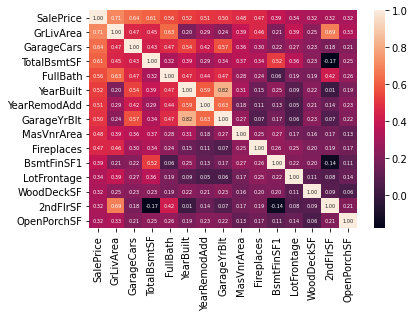

In [87]:
#chcek correlation between data set
n = 15
cols = train_clean.corr().nlargest(n, 'SalePrice')['SalePrice'].index
hm = sns.heatmap(
    data=np.corrcoef(train_clean[cols].values.T),
    cbar=True,
    annot=True,
    fmt='.2f',
    annot_kws={'size': 5},
    yticklabels=cols.values,
    xticklabels=cols.values
)
plt.show()

The following two variables are still highly correlated, so we need to remove one of them:


*   YearBuilt, GarageYrBlt
*   GrLivArea, 2ndFlrSF




In [88]:
#drop two redundant variables
train_finalized=train_top15.drop(['GarageYrBlt','2ndFlrSF'],axis=1)
train_finalized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   int64  
 1   GrLivArea     1460 non-null   int64  
 2   GarageCars    1460 non-null   int64  
 3   TotalBsmtSF   1460 non-null   int64  
 4   FullBath      1460 non-null   int64  
 5   YearBuilt     1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   MasVnrArea    1460 non-null   float64
 8   Fireplaces    1460 non-null   int64  
 9   BsmtFinSF1    1460 non-null   int64  
 10  LotFrontage   1460 non-null   float64
 11  WoodDeckSF    1460 non-null   int64  
 12  OpenPorchSF   1460 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 159.7 KB


Final 12 Input Variables: 
*   GrLivArea, GarageCars, TotalBsmtSF, FullBath, YearBuilt, YearRemodAdd, MasVnrArea, Fireplaces, BsmtFinSF1, LotFrontage, WoodDeckSF, OpenPorchSF


Then, let's add dummy variable to those top 12 input variables.

In [89]:
train_finalized_withdummy=train_finalized
train_finalized_withdummy['MSZoning_C (all)']=train_withdummy['MSZoning_C (all)']
train_finalized_withdummy['MSZoning_FV']=train_withdummy['MSZoning_FV']
train_finalized_withdummy['MSZoning_RH']=train_withdummy['MSZoning_RH']
train_finalized_withdummy['MSZoning_RL']=train_withdummy['MSZoning_RL']
train_finalized_withdummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SalePrice         1460 non-null   int64  
 1   GrLivArea         1460 non-null   int64  
 2   GarageCars        1460 non-null   int64  
 3   TotalBsmtSF       1460 non-null   int64  
 4   FullBath          1460 non-null   int64  
 5   YearBuilt         1460 non-null   int64  
 6   YearRemodAdd      1460 non-null   int64  
 7   MasVnrArea        1460 non-null   float64
 8   Fireplaces        1460 non-null   int64  
 9   BsmtFinSF1        1460 non-null   int64  
 10  LotFrontage       1460 non-null   float64
 11  WoodDeckSF        1460 non-null   int64  
 12  OpenPorchSF       1460 non-null   int64  
 13  MSZoning_C (all)  1460 non-null   uint8  
 14  MSZoning_FV       1460 non-null   uint8  
 15  MSZoning_RH       1460 non-null   uint8  
 16  MSZoning_RL       1460 non-null   uint8  


* Visualize the correlation within the data set

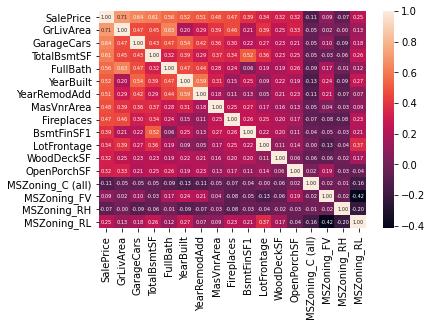

In [90]:
#chcek correlation between variables
cols = train_finalized_withdummy.columns
hm = sns.heatmap(
    data=np.corrcoef(train_finalized_withdummy.values.T),
    cbar=True,
    annot=True,
    fmt='.2f',
    annot_kws={'size': 5},
    yticklabels=cols.values,
    xticklabels=cols.values
)
plt.show()

Final 16 Input Variables including 4 dummy variables for 'MSZoning' categorical variable: 
*   GrLivArea, GarageCars, TotalBsmtSF, FullBath, YearBuilt, YearRemodAdd, MasVnrArea, Fireplaces, BsmtFinSF1, LotFrontage, WoodDeckSF, OpenPorchSF, MSZoning_C (all), MSZoning_FV, MSZoning_RH, MSZoning_RL